In [4]:
import os
import pandas as pd
os.chdir('/content/sample_data')

In [ ]:
ep0 = pd.read_csv('./epoch_0_predictions.csv')
ep1 = pd.read_csv('./epoch_1_predictions.csv')
ep2 = pd.read_csv('./epoch_2_predictions.csv')
ep3 = pd.read_csv('./epoch_3_predictions.csv')
ep4 = pd.read_csv('./epoch_4_predictions.csv')

In [5]:
import numpy as np
difficulty = []
confidence = []
for i in range((1000)):
    val1 = ep0.iloc[i][int(ep0.iloc[i]['label'])+2]
    val2 = ep1.iloc[i][int(ep1.iloc[i]['label'])+2]
    val3 = ep2.iloc[i][int(ep2.iloc[i]['label'])+2]
    val4 = ep3.iloc[i][int(ep3.iloc[i]['label'])+2]
    val5 = ep4.iloc[i][int(ep4.iloc[i]['label'])+2]
    
    confidence.append((val1+val2+val3+val4+val5)/5)
    difficulty.append(np.std([val1,val2,val3,val4,val5]))
    

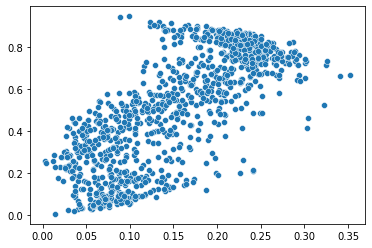

In [6]:
import seaborn as sns
sns.scatterplot(x= difficulty, y = confidence)

In [7]:
confidence_sorted_indices = sorted(range(len(confidence)),key=confidence.__getitem__)[::-1]

In [8]:
confidence_sorted_indices[0:5]

[733, 669, 385, 102, 403]

In [10]:
train_df = pd.read_csv('sst2_train.csv')

In [ ]:
train_df.head()

In [27]:
selected_data_easy = train_df.iloc[confidence_sorted_indices[:200]]
selected_data_ambi = train_df.iloc[confidence_sorted_indices[200:500]]
selected_data_hard = train_df.iloc[confidence_sorted_indices[500:]]

In [26]:
confidence[confidence_sorted_indices[200]]

0.7816274225711822

In [28]:
selected_data_easy.shape

(200, 12)

In [23]:
selected_data_easy.to_csv('selected_data_easy.csv')
selected_data_ambi.to_csv('selected_data_ambi.csv')
selected_data_hard.to_csv('selected_data_hard.csv')